# PREDICTION OF INFLUENCE IN VACCINATION RATES

# Business problem

The goal is to predict how likely individuals are to receive their H1N1 seasonal flu vaccines. Seasonal flu vaccines protect against the four influenza viruses that research indicates will be most common during the upcoming season while the H1N1  is an inactivated influenza virus vaccine indicated for immunization of persons 4 years of age and older against influenza disease caused by pandemic (H1N1) 2009 virus.                                                                                            


The business problem is did the survey respondent receive the seasonal flu vaccine?

The aim is to get an understanding of how people’s backgrounds, opinions, and health behaviors are related to their personal vaccination patterns can provide guidance for future public health efforts

# Data understanding

The survey was conducted by the National 2009 H1N1 Flu Survey. A phone survey was conducted and participants were asked personal questions as well as whether they had received the H1N1 and seasonal flu vaccinations. These extra inquiries included their social, economic, and demographic background, viewpoints on disease risks and the usefulness of vaccinations, as well as actions aimed at preventing transmission.


There are two target variables in the dataset:

                The seasonal flu vaccines
                The H1N1 vaccines
                
For this project we'll focus on the seasonal vaccines as our target variable.
    
The dataset has 38 columns.
Below are the columns that are in the dataset:


   * age_group - Age group of respondent.
   * education - Self-reported education level.
   * race - Race of respondent.
   * sex - Gender of respondent.
   * income_poverty - Household annual income of respondent with respect to 2008 Census poverty thresholds. 
   * marital_status - Marital status of respondent.
   * rent_or_own - Housing situation of respondent.
   * employment_status - Employment status of respondent.
   * h1n1_concern - Level of concern about the H1N1 flu.
   * h1n1_knowledge - Level of knowledge about H1N1 flu.
   * behavioral_wash_hands - Has frequently washed hands or used hand sanitizer. (binary)
   * behavioral_large_gatherings - Has reduced time at large gatherings. (binary)
   * behavioral_antiviral_meds - Has taken antiviral medications. (binary)
   * behavioral_avoidance - Has avoided close contact with others with flu-like symptoms. (binary)
   * behavioral_face_mask - Has bought a face mask. (binary)
   * behavioral_outside_home - Has reduced contact with people outside of own household. (binary)
   * behavioral_touch_face - Has avoided touching eyes, nose, or mouth. (binary)
   * doctor_recc_h1n1 - H1N1 flu vaccine was recommended by doctor. (binary)
   * doctor_recc_seasonal - Seasonal flu vaccine was recommended by doctor. (binary)
   * chronic_med_condition - Has any of the following chronic medical conditions
   * child_under_6_months - Has regular close contact with a child under the age of six months. (binary)
   * health_worker - Is a healthcare worker. (binary)
   * health_insurance - Has health insurance. (binary)
   * opinion_h1n1_vacc_effective - Respondent's opinion about H1N1 vaccine effectiveness.
   * opinion_h1n1_risk - Respondent's opinion about risk of getting sick with H1N1 flu without vaccine.
   * opinion_h1n1_sick_from_vacc - Respondent's worry of getting sick from taking H1N1 vaccine.
   * opinion_seas_vacc_effective - Respondent's opinion about seasonal flu vaccine effectiveness.
   * opinion_seas_risk - Respondent's opinion about risk of getting sick with seasonal flu without vaccine.
   * opinion_seas_sick_from_vacc - Respondent's worry of getting sick from taking seasonal flu vaccine.
   * hhs_geo_region - Respondent's residence using a 10-region geographic classification defined by the U.S. Dept. 
   * census_msa - Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census.
   * household_adults - Number of other adults in household, top-coded to 3.
   * household_children - Number of children in household, top-coded to 3.
   * employment_industry - Type of industry respondent is employed in. Values are represented as short random character strings.
   * employment_occupation - Type of occupation of respondent. Values are represented as short random character strings.

# Data Preparation

# a.Loading the data

In [28]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
from numpy import mean
from numpy import isnan
from numpy import std
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

In [2]:
#loading the dataset
df = pd.read_csv("H1N1_Flu_Vaccines.csv")
df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


# b. Inspecting the data

In [3]:
#checking the shape
df.shape

(26707, 38)

In [4]:
#checking the info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [5]:
#Checking for missing values
df.isna().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [6]:
#Checking the descriptive statistics
df.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454,0.465608
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052,0.498825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000,1.000000


In [7]:
#checking the datatypes
df.dtypes

respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                      

# EDA

Let's now look at the diffrent variables that we have and there relationship with our target variable.

In [8]:
#Checking the value counts for the target variable
df['seasonal_vaccine'].value_counts()

0    14272
1    12435
Name: seasonal_vaccine, dtype: int64

Plotting the distribution on who got the seasonal vaccine and who didnt.

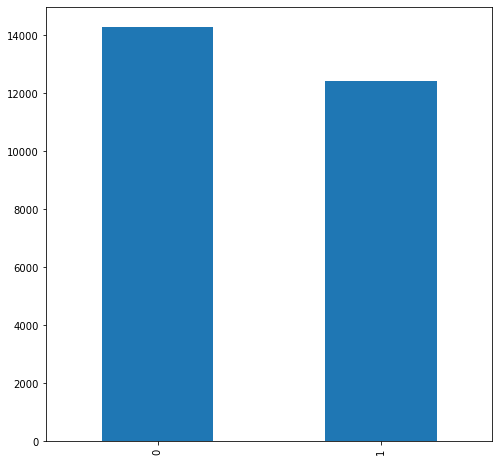

In [9]:
#plotting the distribution of value counts for the target variable
plt.figure(figsize=(8, 8))
df['seasonal_vaccine'].value_counts().plot(kind='bar')
plt.show()

This shows that those who received the seasonal vaccine was fewer than those who received the vaccine.

Now let's examine the relationship between the target variable and other variables in your dataset. 

1. Vaccination between Age groups

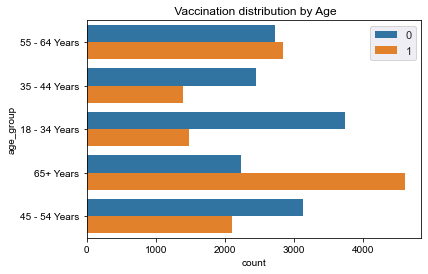

In [10]:
sns.countplot(y=df['age_group'],hue=df['seasonal_vaccine'],data=df)
sns.set(rc={'figure.figsize':(20,10)})
plt.xticks()
plt.title(' Vaccination distribution by Age')
plt.legend(loc=1)  
plt.show()

We can see that 65 and above years received the seasonal vaccine compared to the younger age below 65.

2. Vaccination between Gender

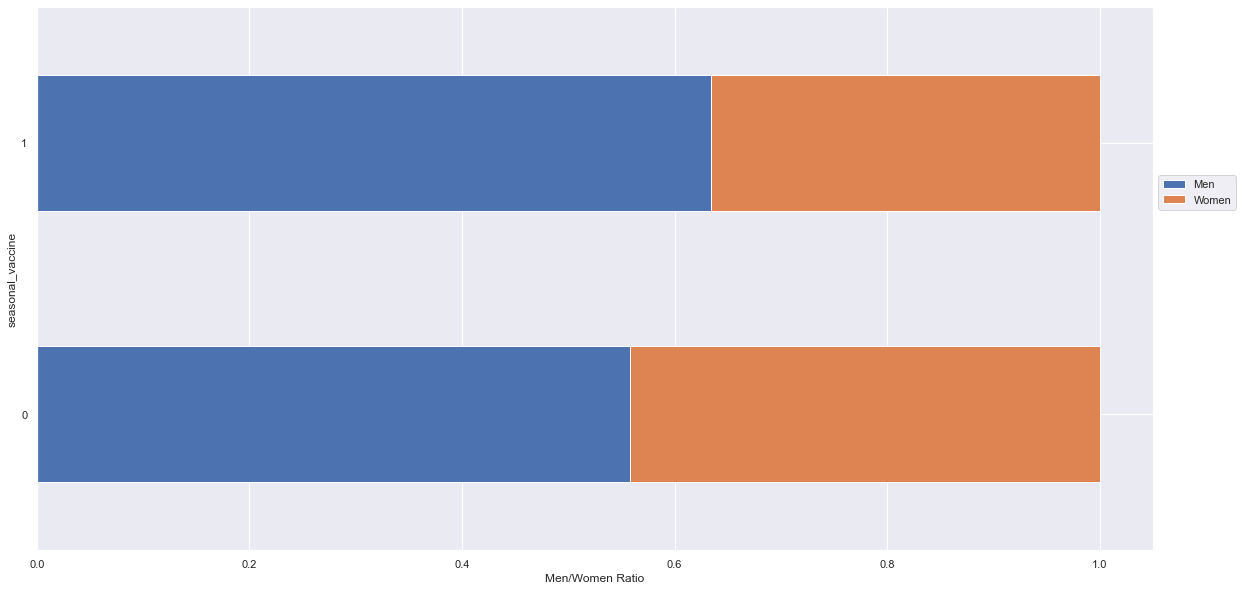

In [11]:
gender_group = df.groupby(['seasonal_vaccine', 'sex']).size().unstack()

gender_group.apply(lambda x:x/x.sum(), axis=1).plot(kind='barh', stacked=True, legend=False)

plt.legend(['Men', 'Women'], bbox_to_anchor=(1.0, 0.7))

plt.xlabel('Men/Women Ratio')
plt.show()

More men got the vaccine compared to the women.

3. Vaccination distribution in employment status

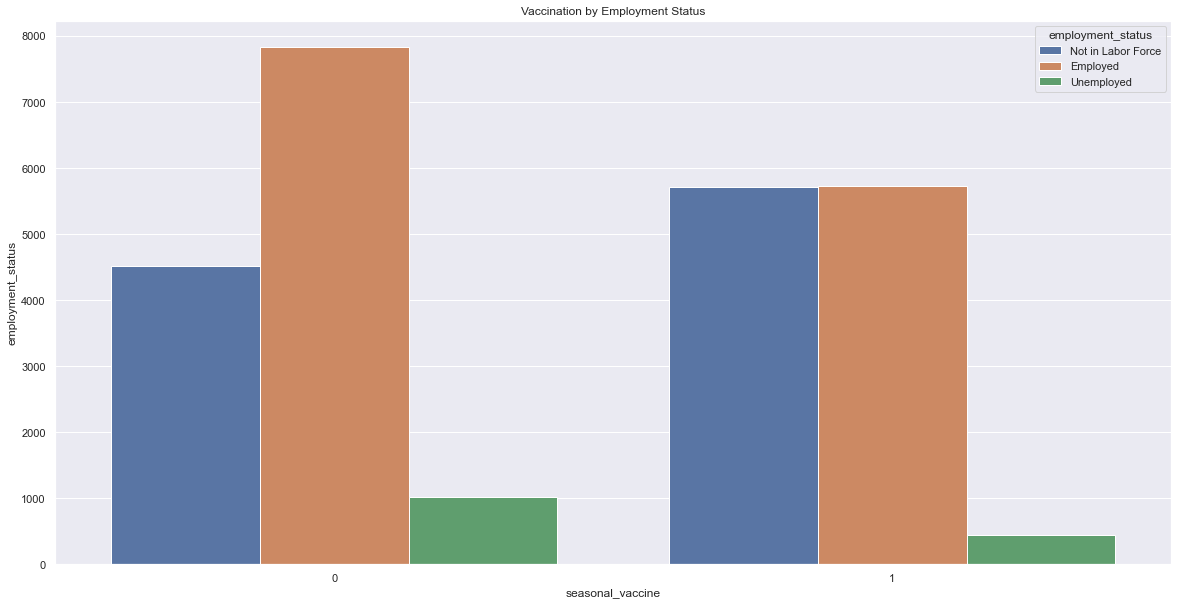

In [12]:
sns.countplot(x=df["seasonal_vaccine"], hue=df["employment_status"], data=df)
plt.title("Vaccination by Employment Status")
plt.xlabel("seasonal_vaccine")
plt.ylabel("employment_status")
plt.show()

We can see that those who did not receive the vaccine were mostly employeed people.

4. Vaccine distribution by Race

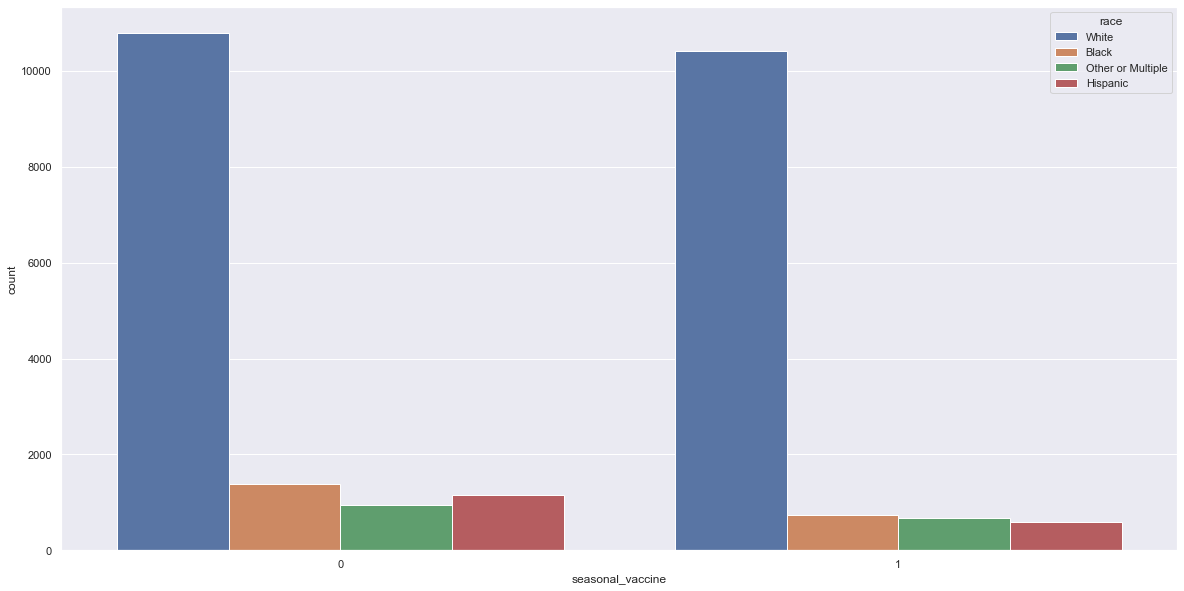

In [13]:
sns.countplot(x=df["seasonal_vaccine"], hue=df["race"], data=df)
plt.show()

Compared to individuals who received the vaccine, a large proportion of white people did not. When compared to other races, the distribution of the white race is high.

5. Distribution of health workers who got the vaccine

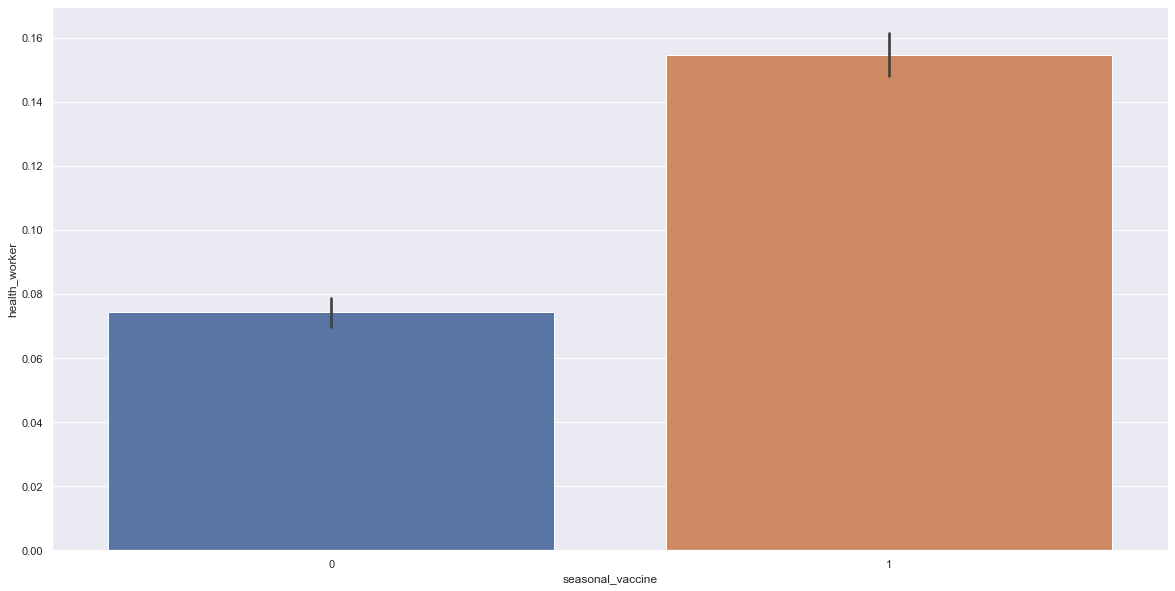

In [14]:
sns.barplot(x = 'seasonal_vaccine',y = 'health_worker',data = df)
plt.show()

We can see that most health workers got the vaccine.

6. Vaccination distribution based on Opinions

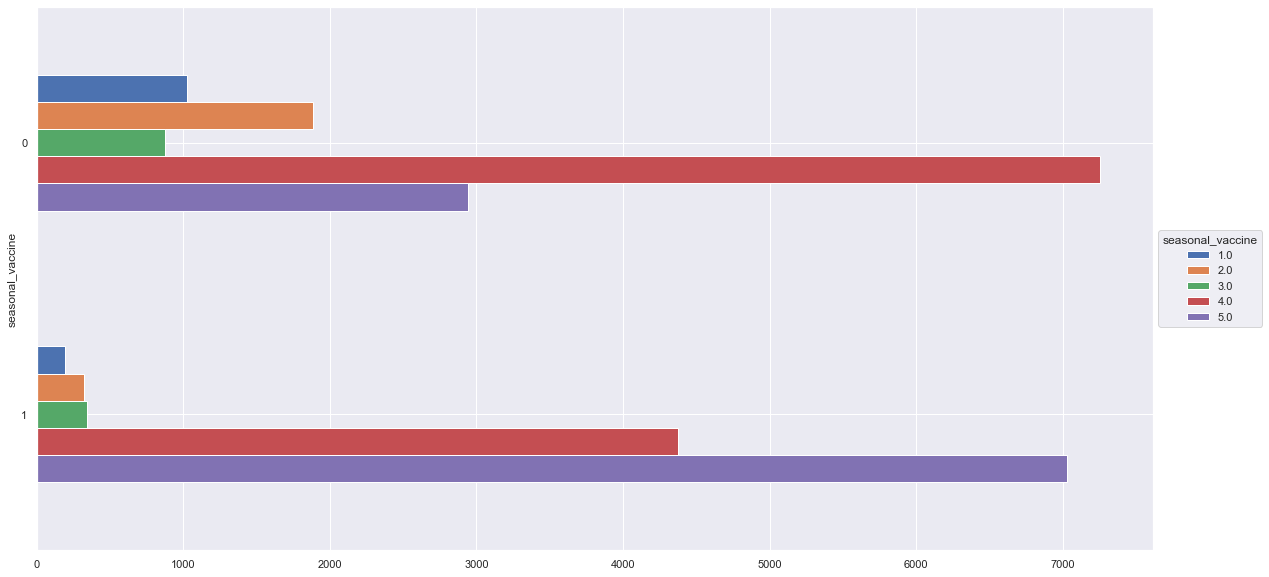

In [15]:

numbers = (df[['seasonal_vaccine', 'opinion_seas_vacc_effective']]
              .groupby(['seasonal_vaccine', 'opinion_seas_vacc_effective'])
              .size()
              .unstack('opinion_seas_vacc_effective')
         )
numbers
ax = numbers.plot.barh()
ax.invert_yaxis()
ax.legend(
    loc='center left', 
    bbox_to_anchor=(1.0, 0.5), 
    title='seasonal_vaccine'
)
plt.show()

7. Vaccination through doctor recommendations

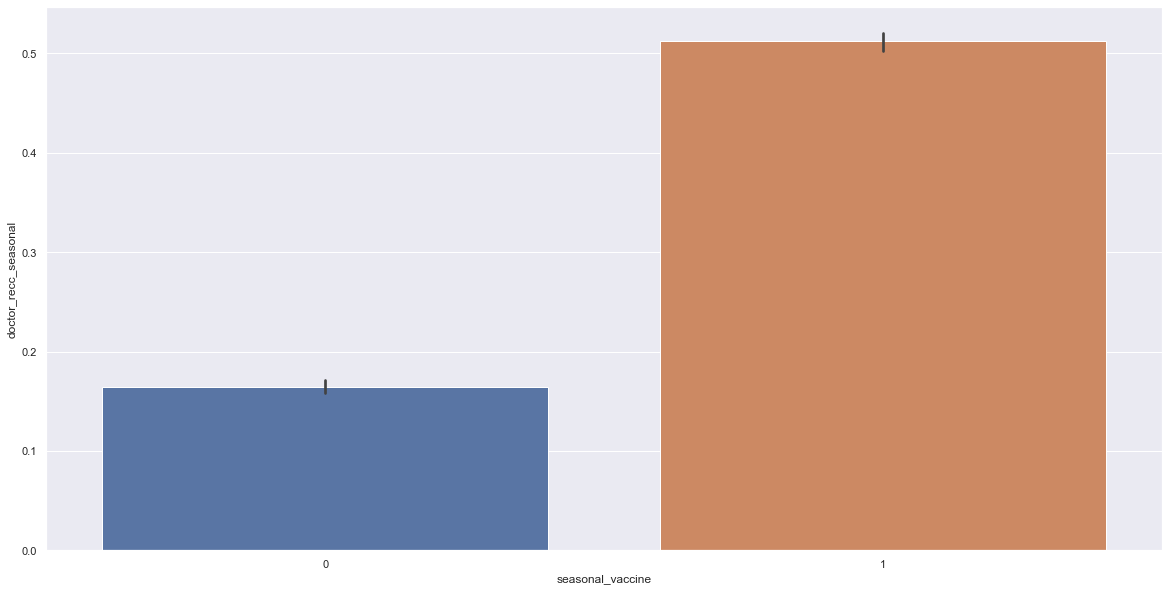

In [16]:
sns.barplot(x = df['seasonal_vaccine'], y = df['doctor_recc_seasonal'], data = df)
plt.show()

8. Vaccination Distribution for respondents with Chronic Medical Conditions

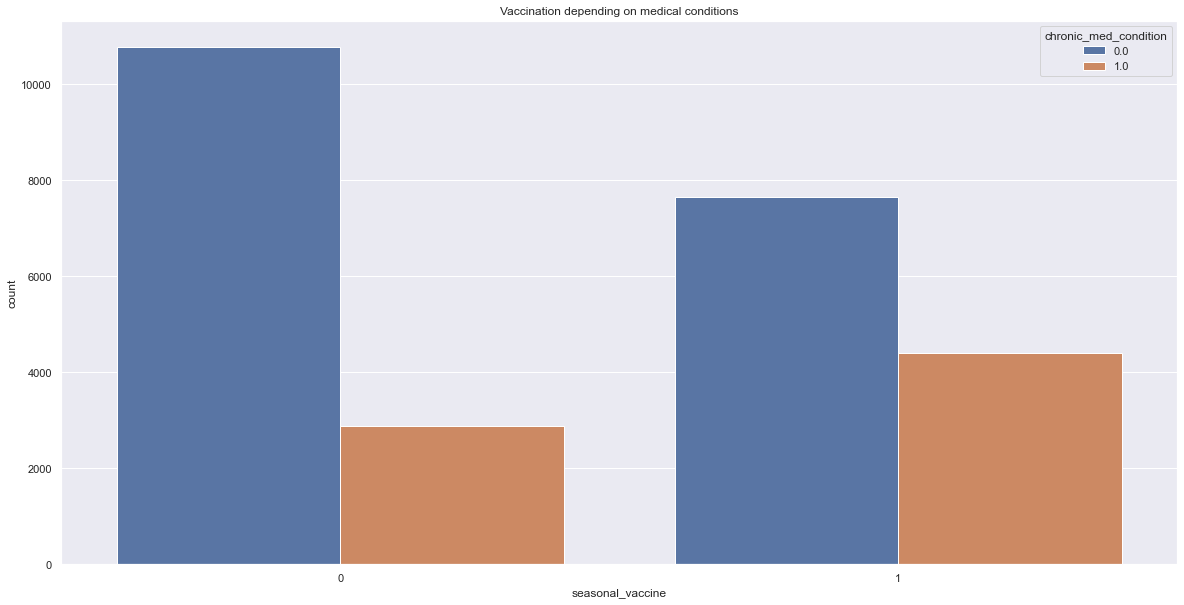

In [17]:
sns.countplot(x=df['seasonal_vaccine'],hue=df['chronic_med_condition'],data=df)
sns.set(rc={'figure.figsize':(10,10)})
plt.title("Vaccination depending on medical conditions")
plt.show()

# Data Cleaning

Looking at the dataset, we have so many columns and alot of missing data that need cleaning. I will clean the data by first removing all columns with object as a datatype.

In [18]:
#drop non-numeric columns
new_df= df.drop(df.columns[df.dtypes == 'object'], axis=True)
     

In [19]:
#checking the new shape
new_df.shape

(26707, 26)

In [20]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

Now we only have variables with either int64 or float64.

In [21]:
new_df.isna().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
household_adults                 249
household_children               249
h1n1_vaccine                       0
seasonal_vaccine                   0
dtype: int64

There is still alot of missing values. Due to this we will use the mode (most frequent category) of the column to fill in missing values for categorical data to solve that.

In [22]:

# Creating a SimpleImputer for categorical columns
categorical_columns = ['behavioral_avoidance', 'health_worker','h1n1_concern','h1n1_knowledge','behavioral_antiviral_meds','behavioral_face_mask','behavioral_wash_hands','behavioral_large_gatherings',
                       'behavioral_outside_home','behavioral_touch_face','doctor_recc_h1n1' ,'doctor_recc_seasonal','chronic_med_condition','child_under_6_months','health_insurance','opinion_h1n1_vacc_effective','opinion_h1n1_risk',
                       'opinion_h1n1_sick_from_vacc','opinion_seas_vacc_effective','opinion_seas_risk','opinion_seas_sick_from_vacc', 
                       'household_adults','household_children']  # List the categorical columns
imputer = SimpleImputer(strategy='most_frequent')

# Fit and transform the imputer on the dataset
new_df[categorical_columns] = imputer.fit_transform(new_df[categorical_columns])

In [23]:
#Checking missing values
new_df.isna().sum()

respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
household_adults               0
household_children             0
h1n1_vaccine                   0
seasonal_vaccine               0
dtype: int64

Now we have no missing values

# Train-test split

In [24]:
#Defining our idependent and dependent variables
X = new_df.drop(['seasonal_vaccine'], axis=1)
y = new_df['seasonal_vaccine']

Let's split the data and use 80% of it as training set and 20% of it as testing set.

In [25]:
#Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.20, random_state=42)

In [26]:
new_df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,3.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,5.0,4.0,4.0,4.0,2.0,4.0,0.0,0.0,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3.0,1.0,1.0,4.0,1.0,2.0,2.0,0.0,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,3.0,3.0,5.0,5.0,4.0,1.0,0.0,0.0,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,3.0,3.0,2.0,3.0,1.0,4.0,1.0,0.0,0,0


# Modelling

To start us off,Lets use a simple baseline to model our data.Logistic regression is a good starting point for my classification problem

In [33]:
# Initializing and training my logistic regression model
baseline_model = LogisticRegression()
baseline_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = baseline_model.predict(X_test)

# Evaluating the baseline model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#The classification metrics
print(classification_report(y_test, y_pred))

Accuracy: 0.7104080868588544
              precision    recall  f1-score   support

           0       0.73      0.74      0.73      2891
           1       0.69      0.68      0.68      2451

    accuracy                           0.71      5342
   macro avg       0.71      0.71      0.71      5342
weighted avg       0.71      0.71      0.71      5342



The classification report for this simple baseline model:

Accuracy: 0.7104

This is the proportion of correctly classified instances, which means that your model is correctly predicting the vaccination status about 71.04% of the time.

   * Precision:

For class 0 (no vaccination): 0.73
Of all the instances predicted as not receiving the vaccine, 73% were correct.
For class 1 (vaccinated): 0.69
Of all the instances predicted as receiving the vaccine, 69% were correct.

  * Recall:

For class 0 (no vaccination): 0.74
The model correctly identified 74% of all instances of not receiving the vaccine.
For class 1 (vaccinated): 0.68
The model correctly identified 68% of all instances of receiving the vaccine.


* F1-Score:

The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall.
For class 0: 0.73
For class 1: 0.68

These results suggest that your baseline model has a reasonably good balance between precision and recall for both classes. However, there's room for improvement. Let's explore a more complex model to achieve a better performance.

In [36]:
# Initializing and training the Random Forest Classifier
complex_model = RandomForestClassifier(n_estimators=100, random_state=42)
complex_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred_complex = complex_model.predict(X_test)

# Evaluating the complex model
accuracy_complex = accuracy_score(y_test, y_pred_complex)
print("Accuracy (Complex Model):", accuracy_complex)

#The classification metrics
print(classification_report(y_test, y_pred_complex))

Accuracy (Complex Model): 0.7879071508798203
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      2891
           1       0.78      0.75      0.76      2451

    accuracy                           0.79      5342
   macro avg       0.79      0.79      0.79      5342
weighted avg       0.79      0.79      0.79      5342



The classification report for the more complex model (Random Forest) :

Accuracy: 0.7879

This more complex model is correctly predicting the vaccination status approximately 78.79% of the time, which is an improvement over the baseline model.

   * Precision:

For class 0 (no vaccination): 0.80
Of all the instances predicted as not receiving the vaccine, 80% were correct.
For class 1 (vaccinated): 0.78
Of all the instances predicted as receiving the vaccine, 78% were correct.

   * Recall:

For class 0 (no vaccination): 0.82
The model correctly identified 82% of all instances of not receiving the vaccine.
For class 1 (vaccinated): 0.75
The model correctly identified 75% of all instances of receiving the vaccine.
   
   
  * F1-Score:

The F1-score for both classes has improved over the baseline model.
For class 0: 0.81
For class 1: 0.76

These results suggest that Random Forest has  an improved accuracy and F1-scores over the baseline model.  This is a good outcome, and the model appears to be better at predicting vaccination patterns.

You can further fine-tune this model using hyperparameter tuning to potentially achieve even better performance.

In [37]:
from sklearn.model_selection import RandomizedSearchCV

# Defining a grid of hyperparameters to search
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initializing RandomizedSearchCV with the Random Forest model and parameter grid
hyperparameter_model = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_distributions=param_dist, n_iter=10, cv=3, random_state=42)

# Fitting the hyperparameter-tuned model
hyperparameter_model.fit(X_train, y_train)

# Getting the best hyperparameters
best_params = hyperparameter_model.best_params_
print("Best Hyperparameters:", best_params)

# Making predictions on the test set using the best model
best_model = hyperparameter_model.best_estimator_
y_pred_hyperparameter = best_model.predict(X_test)

# Evaluating the hyperparameter-tuned model
accuracy_hyperparameter = accuracy_score(y_test, y_pred_hyperparameter)
print("Accuracy (Hyperparameter-Tuned Model):", accuracy_hyperparameter)

# The classification metrics
print(classification_report(y_test, y_pred_hyperparameter))

Best Hyperparameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 30}
Accuracy (Hyperparameter-Tuned Model): 0.7950205915387495
              precision    recall  f1-score   support

           0       0.81      0.82      0.81      2891
           1       0.78      0.77      0.77      2451

    accuracy                           0.80      5342
   macro avg       0.79      0.79      0.79      5342
weighted avg       0.79      0.80      0.79      5342



The classification report having added the hyperparameters

Accuracy:0.7950

This model is correctly predicting the vaccination status approximately 79.50% of the time, which is a slight improvement over the more complex model without hyperparameter tuning.

   * Precision:

For class 0 (no vaccination): 0.81
Of all the instances predicted as not receiving the vaccine, 81% were correct.
For class 1 (vaccinated): 0.78
Of all the instances predicted as receiving the vaccine, 78% were correct.
   * Recall:

For class 0 (no vaccination): 0.82
The model correctly identified 82% of all instances of not receiving the vaccine.
For class 1 (vaccinated): 0.77
The model correctly identified 77% of all instances of receiving the vaccine.
   * F1-Score:

The F1-scores for both classes have slightly improved over the more complex model, demonstrating a better balance between precision and recall.
For class 0: 0.81
For class 1: 0.77




# Evaluation

After tuning the model , Our model with hyperparameters has performed well and this is what i will consider as my final and best model among the three tested.


Our model has a great performance from 71% to 79%. This means that, in a 100 test samples, 79 of them will be classified correctly. The model will predict 79 samples correct.

From the Data Exploratory Analysis we have the following findings:

  * The number of people who received the seasonal vaccine is lower than those who didn't receive the vaccine.
  * Most of those who received the vaccine were male.
  * Most of the health workers received the vaccine.
  * The older people(65 Years and above) received the vaccine in high numbers compared to the young people.
  * The number of those who received the vaccination through reccomendation by a doctor was also high.
  * People with chronic medical conditions didnot receive the vaccine.
  * Factors like employment status and race rarely affected the vaccination rate.

# Conclusion

The reason why i chose to use a Machine learning rather than a simple form of data analysis is because my problem involves predicting vaccination patterns based on a wide range of features, including personal backgrounds, opinions, and health behaviors. The relationships between these variables may be complex and non-linear, making machine learning well-suited for capturing these patterns.

     Limitations



Here are the limitations for this analysis:

  - Data Quality: The quality of predictions heavily depends on the quality of the data.Due to the survey data being incomplete, inaccurate, or biased, the model's performance suffered.

- Assumptions: Our models assumes that the relationships between features and vaccine receipt are consistent over time. However, public health behaviors can change, and our models may not capture evolving patterns.

- Ethical Considerations: The analysis does not consider ethical aspects, such as fairness, privacy, and bias in the data or models. These factors should be carefully addressed in real-world applications.

     Recommendations

 

 - Public Awareness Campaigns:

Launch comprehensive public awareness campaigns to educate the public about the importance of the H1N1 vaccine. Highlight its effectiveness in preventing the spread of the virus and the potential severity of H1N1 influenza.
 - Healthcare Provider Involvement:

Encourage healthcare providers to actively recommend the H1N1 vaccine to their patients. The recommendation of a trusted healthcare professional can significantly influence individual vaccination decisions.
 - Transparency and Communication:

Maintain transparent and open communication with the public regarding the development, testing, and safety of the H1N1 vaccine. Address concerns and misconceptions promptly to build trust.